In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
file_path = '/content/sample_data/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

In [7]:
print("last few rows of the dataset:")
print(df.tail())

last few rows of the dataset:
                      Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action     4.6    11   
15505                Zulmi  (1999)  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj  (2005)      NaN         Action     NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja  


In [8]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [9]:
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
          Name    Year Duration  Genre       Rating Votes      Director  \
count    15509   14981     7240  13632  7919.000000  7920         14984   
unique   13838     102      182    485          NaN  2034          5938   
top     Anjaam  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq         7     410      240   2780          NaN   227            58   
mean       NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std        NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min        NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%        NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%        NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%        NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max        NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   131

In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [11]:
df = df.dropna(subset=['Rating'])   # Drop rows with missing target values (assuming 'rating' is the target column)

In [12]:
print(df.isnull().sum())

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64


In [13]:
df = df.dropna()
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [14]:
df = df.drop_duplicates()

In [15]:
print(df.head())

                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                             #Yaaram  (2019)  110 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
8                  ?: A Question Mark  (2012)   82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi

In [16]:
print(df.tail())

                  Name    Year Duration                      Genre  Rating  \
15493           Zubaan  (2015)  115 min                      Drama     6.1   
15494         Zubeidaa  (2001)  153 min  Biography, Drama, History     6.2   
15503  Zulm Ki Zanjeer  (1989)  125 min       Action, Crime, Drama     5.8   
15505            Zulmi  (1999)  129 min              Action, Drama     4.5   
15508     Zulm-O-Sitam  (1998)  130 min              Action, Drama     6.2   

       Votes         Director         Actor 1          Actor 2  \
15493    408      Mozez Singh   Vicky Kaushal  Sarah Jane Dias   
15494  1,496    Shyam Benegal  Karisma Kapoor            Rekha   
15503     44  S.P. Muthuraman     Chiranjeevi       Jayamalini   
15505    655       Kuku Kohli    Akshay Kumar   Twinkle Khanna   
15508     20     K.C. Bokadia      Dharmendra       Jaya Prada   

                Actor 3  
15493  Raaghavv Chanana  
15494    Manoj Bajpayee  
15503       Rajinikanth  
15505       Aruna Irani  
1550

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB
None


In [18]:
features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
X = df[features]
y = df['Rating']

In [19]:
# One-hot encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

In [20]:
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(features))

In [21]:
print("\nFirst few rows of the encoded features:")
print(X_encoded_df.head())


First few rows of the encoded features:
   Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0           0.0                      0.0                                 0.0   
1           0.0                      0.0                                 0.0   
2           0.0                      0.0                                 0.0   
3           0.0                      0.0                                 0.0   
4           0.0                      0.0                                 0.0   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   Genre_Action, Adventure, Drama  Genre_Action, Adventur

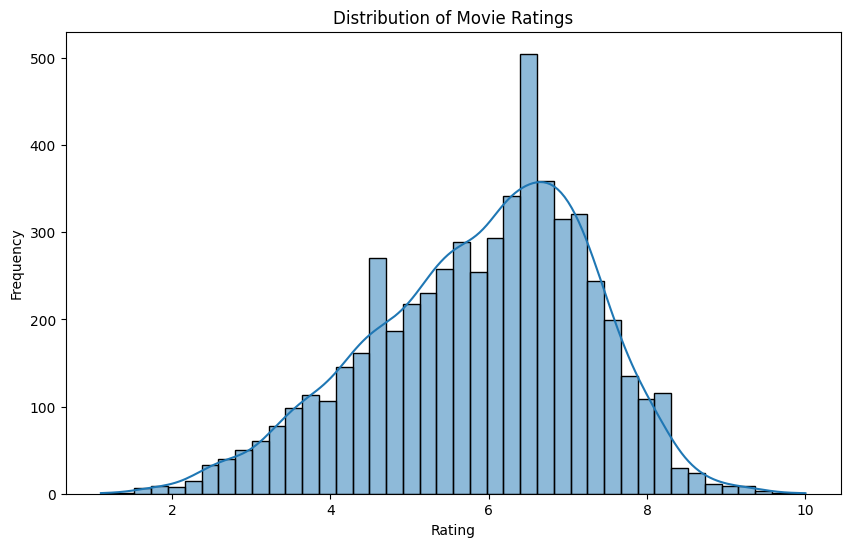

In [22]:
plt.figure(figsize=(10, 6))                                  # Step 4: Exploratory Data Analysis (EDA)
sns.histplot(df['Rating'], kde=True)                         # Plot the distribution of movie ratings
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

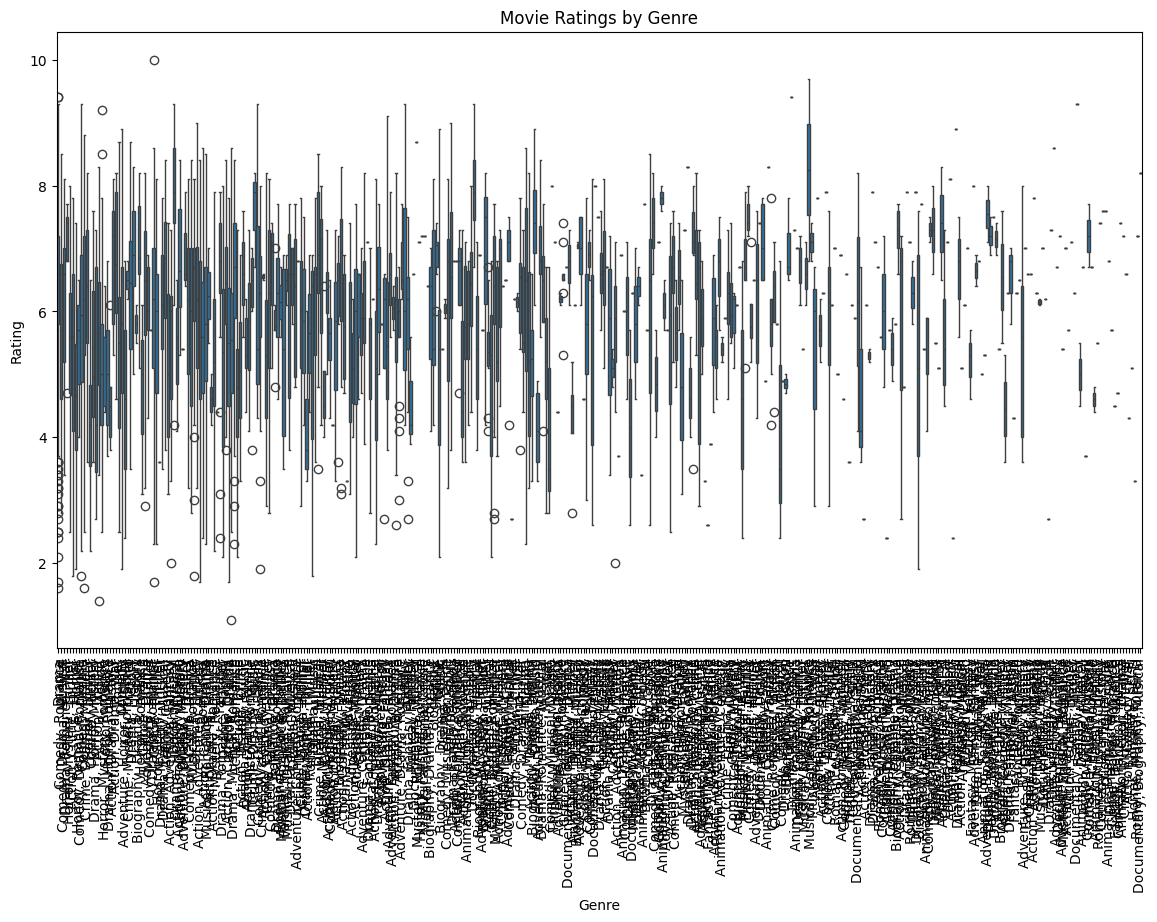

In [23]:
plt.figure(figsize=(14, 8))                                  # Analyze the relationship between genres and ratings
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

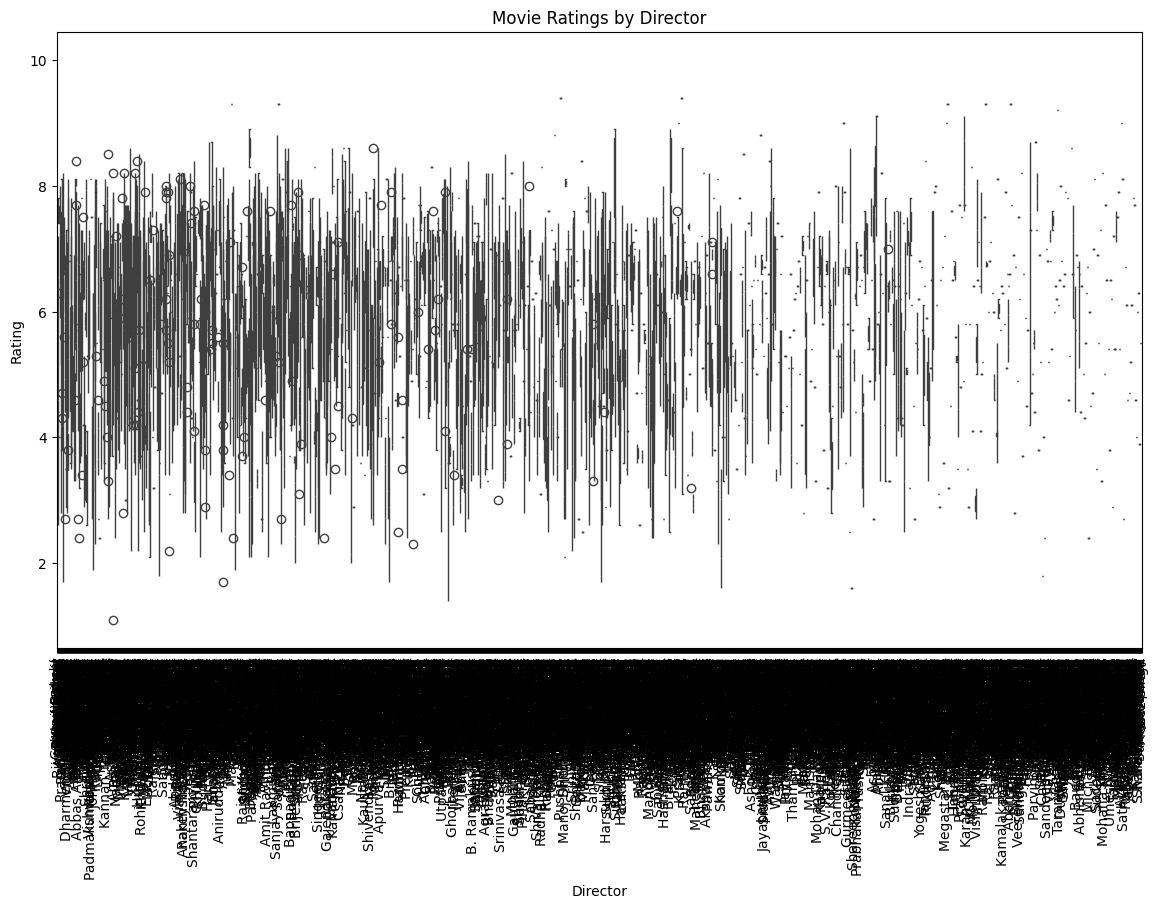

In [24]:
# Analyze the relationship between directors and ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='Director', y='Rating', data=df)
plt.title('Movie Ratings by Director')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [25]:
top_genres = df['Genre'].value_counts().index[:10]        # Group less frequent genres into 'Other'
df['Genre'] = df['Genre'].apply(lambda x: x if x in top_genres else 'Other')

In [26]:
top_directors = df['Director'].value_counts().index[:10]   # Group less frequent directors into 'Other'
df['Director'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

In [27]:
# Step 3: Feature Engineering
# Select relevant features for the model
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df[features]
y = df['Rating']

In [28]:
encoder = OneHotEncoder()                   # One-hot encode categorical features
X_encoded = encoder.fit_transform(X)

In [29]:
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(features))   # Convert the encoded features to a DataFrame

In [30]:
print("\nFirst few rows of the encoded features:")
print(X_encoded_df.head())


First few rows of the encoded features:
   Genre_Action  Genre_Action, Crime, Drama  Genre_Action, Drama  \
0           0.0                         0.0                  0.0   
1           0.0                         0.0                  0.0   
2           0.0                         0.0                  0.0   
3           0.0                         0.0                  0.0   
4           0.0                         0.0                  0.0   

   Genre_Comedy  Genre_Comedy, Drama  Genre_Comedy, Drama, Romance  \
0           0.0                  0.0                           0.0   
1           0.0                  0.0                           0.0   
2           0.0                  0.0                           0.0   
3           0.0                  0.0                           0.0   
4           0.0                  0.0                           0.0   

   Genre_Drama  Genre_Drama, Family  Genre_Drama, Romance  Genre_Other  ...  \
0          1.0                  0.0               

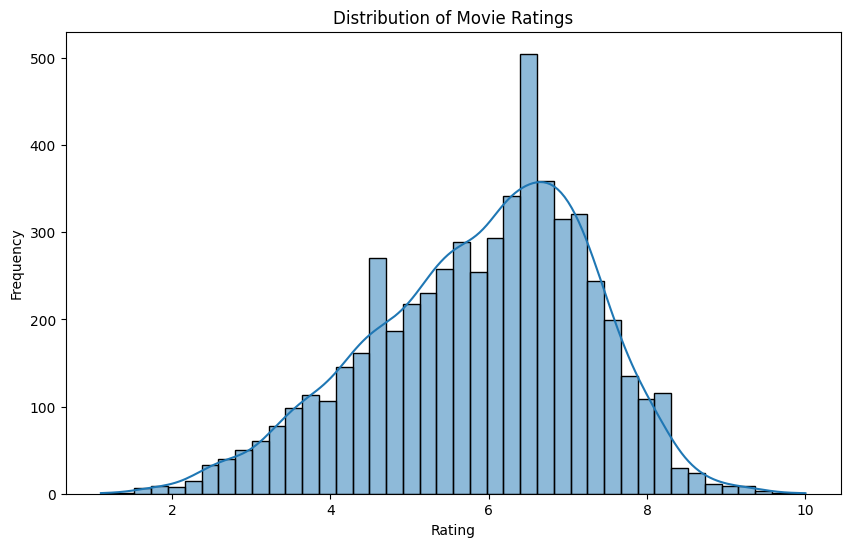

In [31]:
plt.figure(figsize=(10, 6))                                  # Step 4: Exploratory Data Analysis (EDA)
sns.histplot(df['Rating'], kde=True)                         # Plot the distribution of movie ratings
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

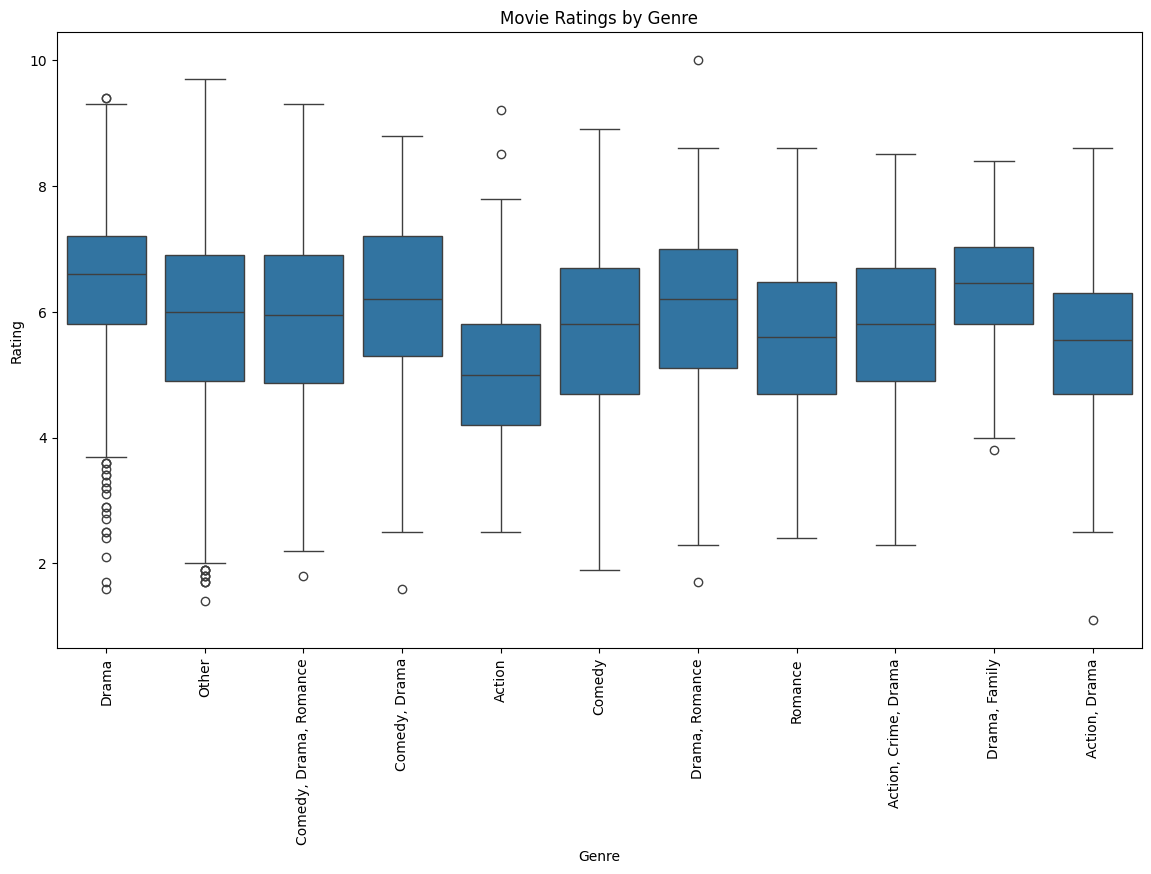

In [32]:
plt.figure(figsize=(14, 8))                     # Analyze the relationship between genres and ratings
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

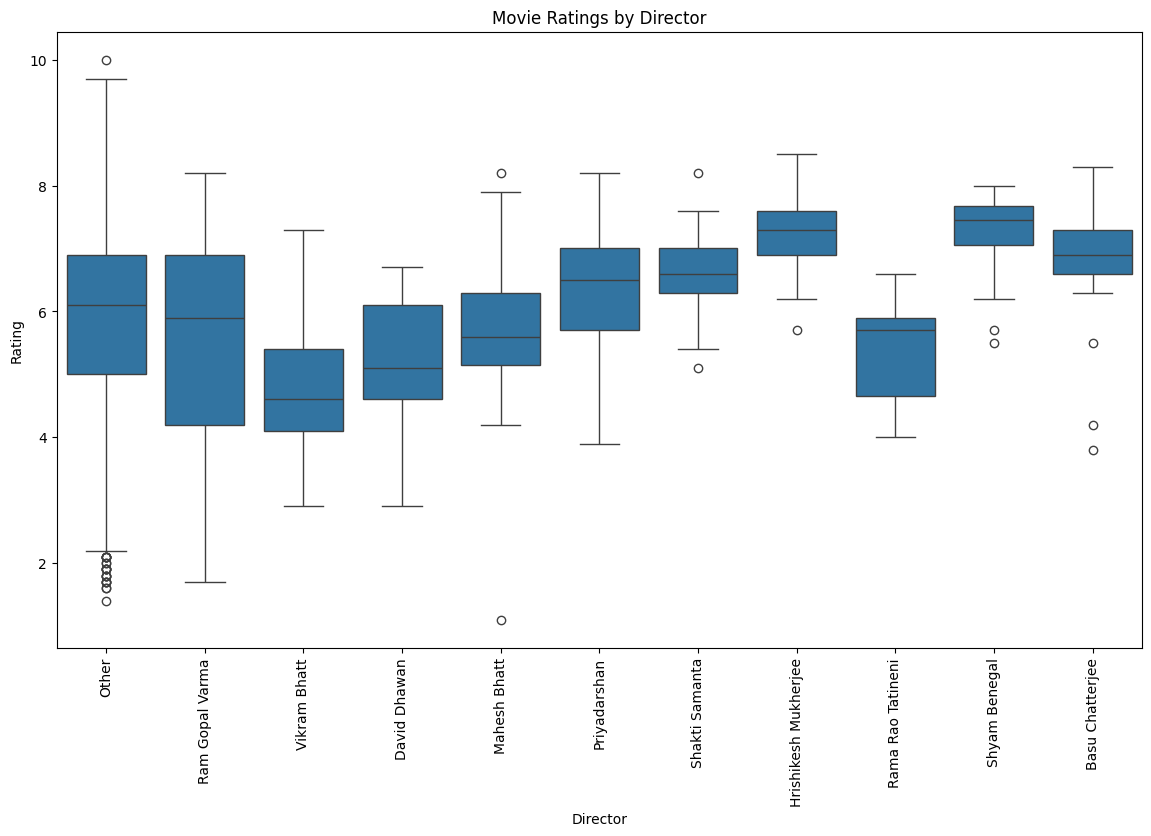

In [33]:
plt.figure(figsize=(14, 8))                                          # Analyze the relationship between directors and ratings
sns.boxplot(x='Director', y='Rating', data=df)
plt.title('Movie Ratings by Director')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Step 5: Model Selection and Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

In [35]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions with Linear Regression
y_linear_pred = linear_model.predict(X_test)

In [37]:
# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)

In [38]:
print(f'\nLinear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R-squared: {r2_linear}')


Linear Regression - Mean Squared Error: 5.622368206144248e+25
Linear Regression - R-squared: -3.0362562430771553e+25


In [39]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Make predictions with Random Forest
y_rf_pred = rf_model.predict(X_test)

In [41]:
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

In [42]:
print(f'\nRandom Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')



Random Forest - Mean Squared Error: 1.727075610517757
Random Forest - R-squared: 0.06732467308522394
